In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os


# Any results you write to the current directory are saved as output.

In [2]:
stroke= pd.read_csv('train_2v.csv')
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [3]:
#checking the shape of our data
stroke.shape

(43400, 12)

In [4]:
stroke.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [5]:
stroke= stroke.drop('id', axis=1)

In [6]:
#checking the null values
stroke.isnull().sum()

gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [7]:
stroke[stroke==0].count()

gender                   0
age                      0
hypertension         39339
heart_disease        41338
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                      0
smoking_status           0
stroke               42617
dtype: int64

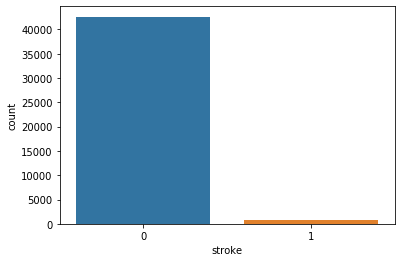

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(stroke['stroke'])

In [9]:
#filling null values with the mean
stroke['bmi'].fillna(stroke['bmi'].mean(), inplace= True)

In [10]:
#filling null values with mode
stroke['smoking_status'].fillna(stroke['smoking_status'].mode()[0], inplace=True)

In [11]:
#checking the data
stroke.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [12]:
stroke.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000
mean,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,22.519649,0.291235,0.212733,43.111751,7.638023,0.133103
min,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,24.000000,0.000000,0.000000,77.540000,23.400000,0.000000
50%,44.000000,0.000000,0.000000,91.580000,28.100000,0.000000
75%,60.000000,0.000000,0.000000,112.070000,32.600000,0.000000
max,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [13]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             43400 non-null  object 
 1   age                43400 non-null  float64
 2   hypertension       43400 non-null  int64  
 3   heart_disease      43400 non-null  int64  
 4   ever_married       43400 non-null  object 
 5   work_type          43400 non-null  object 
 6   Residence_type     43400 non-null  object 
 7   avg_glucose_level  43400 non-null  float64
 8   bmi                43400 non-null  float64
 9   smoking_status     43400 non-null  object 
 10  stroke             43400 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 3.6+ MB


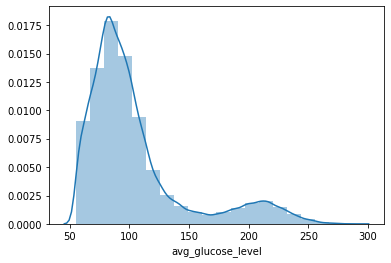

In [14]:
sns.distplot(stroke['avg_glucose_level'], bins=20)

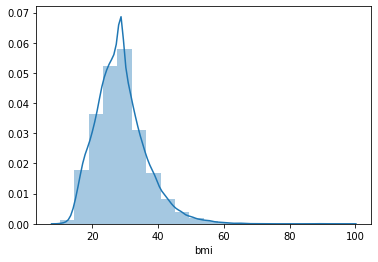

In [15]:
sns.distplot(stroke['bmi'], bins=20)

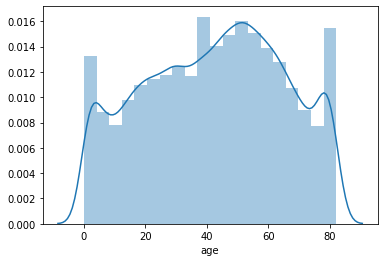

In [16]:
sns.distplot(stroke['age'], bins=20)

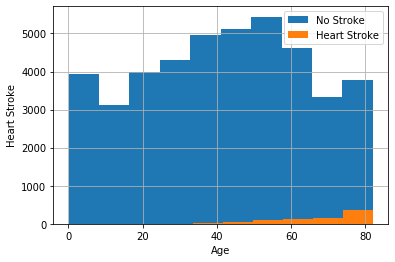

In [17]:
#chances of stroke incraeses with incraese in age
stroke.loc[stroke['stroke'] == 0,
                 'age'].hist(label='No Stroke')
stroke.loc[stroke['stroke'] == 1,
                 'age'].hist(label='Heart Stroke')
plt.xlabel('Age')
plt.ylabel('Heart Stroke')
plt.legend()

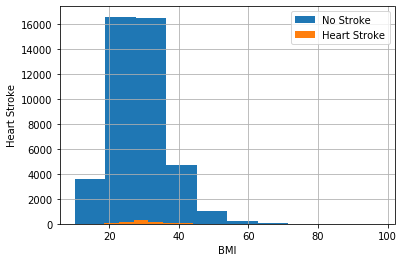

In [18]:
#chances of stroke more with bmi 20-40

stroke.loc[stroke['stroke'] == 0,
                 'bmi'].hist(label='No Stroke')
stroke.loc[stroke['stroke'] == 1,
                 'bmi'].hist(label='Heart Stroke')
plt.xlabel('BMI')
plt.ylabel('Heart Stroke')
plt.legend()

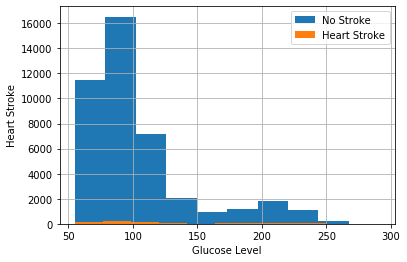

In [19]:
#chances of stroke high with glucose levels in range of 70-100

stroke.loc[stroke['stroke'] == 0,
                 'avg_glucose_level'].hist(label='No Stroke')
stroke.loc[stroke['stroke'] == 1,
                 'avg_glucose_level'].hist(label='Heart Stroke')
plt.xlabel('Glucose Level')
plt.ylabel('Heart Stroke')
plt.legend()

In [20]:
#married females have more chances of heart stroke than married males
pd.pivot_table(stroke, index= 'stroke', columns='gender', values='ever_married', aggfunc= 'count')

gender,Female,Male,Other
stroke,,,
0,25234.0,17372.0,11.0
1,431.0,352.0,NaN


In [21]:
#females with hypertension has more chance of heart stroke than males having hypertension problem
pd.pivot_table(stroke, index= 'stroke', columns='gender', values='hypertension', aggfunc= 'count')

gender,Female,Male,Other
stroke,,,
0,25234.0,17372.0,11.0
1,431.0,352.0,NaN


In [22]:
#females with heart disease has more chances of stroke
pd.pivot_table(stroke, index= 'stroke', columns='gender', values='heart_disease', aggfunc= 'count')

gender,Female,Male,Other
stroke,,,
0,25234.0,17372.0,11.0
1,431.0,352.0,NaN


In [23]:
#people having private jobs and has a habit of smoking has more chance of heart stroke 
pd.pivot_table(stroke, index= 'stroke', columns='work_type', values='smoking_status', aggfunc= 'count')

work_type,Govt_job,Never_worked,Private,Self-employed,children
stroke,,,,,
0,5351.0,177.0,24393.0,6542.0,6154.0
1,89.0,NaN,441.0,251.0,2.0


(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text xticklabel objects>)

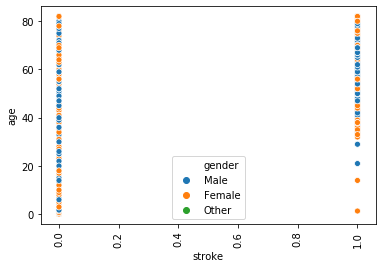

In [24]:
#as age incraeses gender does not play any role in heart stroke
sns.scatterplot(x= 'stroke', y='age', hue='gender', sizes= (15,200), data=stroke)
plt.xticks(rotation=90)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text xticklabel objects>)

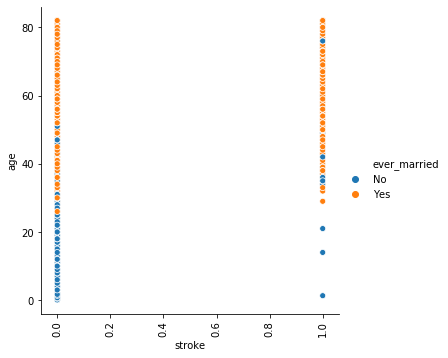

In [25]:
#can't say that marriage plays a role in heart stroke as people generally marry after the age of 25years
sns.relplot(x= 'stroke', y='age', hue= 'ever_married', sizes= (15,200), data=stroke)
plt.xticks(rotation=90)

(array([  0.,  50., 100., 150., 200., 250., 300., 350.]),
 <a list of 8 Text xticklabel objects>)

<Figure size 2016x1440 with 0 Axes>

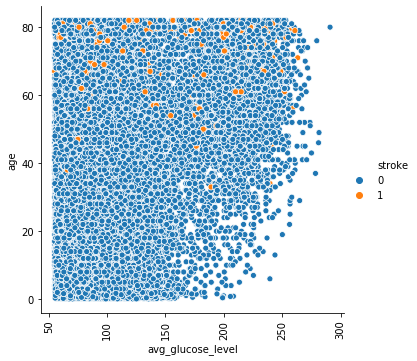

In [26]:
#with age glucose level increases which increases the chances of stroke
plt.figure(figsize=(28,20))
sns.relplot(x= 'avg_glucose_level', y='age', hue= 'stroke', sizes= (15,200), data=stroke)
plt.xticks(rotation=90)

In [27]:
stroke['stroke'].value_counts()

0    42617
1      783
Name: stroke, dtype: int64

In [28]:
#performing label encoding for the dataset
from sklearn import preprocessing 

encoder = preprocessing.LabelEncoder()

for i in stroke.columns:
    if isinstance(stroke[i][0], str):
            stroke[i] = encoder.fit_transform(stroke[i])

In [29]:
#standardizing the dataset with Standard Scaler
from sklearn.preprocessing import StandardScaler 
  
scalar = StandardScaler() 
  
scalar.fit(stroke) 
scaled_data = scalar.transform(stroke)

/home/monad/anaconda3/envs/tff/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/monad/anaconda3/envs/tff/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


In [30]:
#checing the data for first 10 values
stroke.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,3.0,0,0,0,4,0,95.12,18.0,1,0
1,1,58.0,1,0,1,2,1,87.96,39.2,1,0
2,0,8.0,0,0,0,2,1,110.89,17.6,1,0
3,0,70.0,0,0,1,2,0,69.04,35.9,0,0
4,1,14.0,0,0,0,1,0,161.28,19.1,1,0
5,0,47.0,0,0,1,2,1,210.95,50.1,1,0
6,0,52.0,0,0,1,2,1,77.59,17.7,0,0
7,0,75.0,0,1,1,3,0,243.53,27.0,1,0
8,0,32.0,0,0,1,2,0,77.67,32.3,2,0
9,0,74.0,1,0,1,3,1,205.84,54.6,1,0


#Preparing the data for the model
#first creating a base model

In [31]:
#dropping the output label
X= stroke.drop('stroke', axis=1)
X.shape

(43400, 10)

In [32]:
y= stroke['stroke']
y.shape

(43400,)

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3, random_state = 1000)

In [34]:
log= LogisticRegression()

In [35]:
log.fit(X_train,y_train)

/home/monad/anaconda3/envs/tff/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [36]:
log.score(X_train, y_train)

0.9822580645161291

#this clearly shows that the model is overfit or is only considering the values which is high in number
#we need to balance the data which could be done in 2 ways
#either we can undersample the data by dropping the values or oversample using SMOTE
#three models i.e. Logistic Regression, Decision Tree and Random Forest will be created after undersampling 
#confusion matrix for each models will be displayed at the end


In [37]:
stroke['stroke'].value_counts()

0    42617
1      783
Name: stroke, dtype: int64

In [38]:
#to retain the original data, we craeted a copy of the dataset
stroke_copy= stroke.copy()

In [39]:
stroke_copy.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,3.0,0,0,0,4,0,95.12,18.0,1,0
1,1,58.0,1,0,1,2,1,87.96,39.2,1,0
2,0,8.0,0,0,0,2,1,110.89,17.6,1,0
3,0,70.0,0,0,1,2,0,69.04,35.9,0,0
4,1,14.0,0,0,0,1,0,161.28,19.1,1,0


In [40]:
#creating a list of data values which is more in number
#to make a balance data
li = list(stroke_copy[stroke_copy.stroke == 0].sample(n=41800).index)

In [41]:
#dropping the values
stroke_copy = stroke_copy.drop(stroke_copy.index[li])

stroke_copy['stroke'].value_counts()

0    817
1    783
Name: stroke, dtype: int64

In [42]:
X_drop= stroke_copy.drop('stroke', axis=1)
X_drop.shape

(1600, 10)

In [43]:
y_drop= stroke_copy.stroke
y_drop.shape

(1600,)

In [44]:
X_droptr,X_dropts,y_droptr,y_dropts = train_test_split(X_drop,y_drop,test_size=.3, random_state = 1000)

In [45]:
#creating a Logistic Model for the new data
log.fit(X_droptr, y_droptr)

/home/monad/anaconda3/envs/tff/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [46]:
#the accuracy has dropped
log.score(X_droptr, y_droptr)

0.7651785714285714

In [47]:
#predicting the output with Logistic
y_underlog= log.predict(X_dropts)

In [48]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, recall_score, confusion_matrix
print('The accuracy score of the model is:', accuracy_score(y_dropts,y_underlog)*100)
print('The F1 score of the model is:', f1_score(y_dropts, y_underlog)*100)
print('The recall score of the model is:', recall_score(y_dropts, y_underlog)*100)
print('The confusion matrix of the model is:', confusion_matrix(y_dropts, y_underlog))
print('The classification report of logistic model is:', classification_report(y_dropts, y_underlog))

The accuracy score of the model is: 76.66666666666667
The F1 score of the model is: 76.47058823529412
The recall score of the model is: 77.11864406779661
The confusion matrix of the model is: [[186  58]
 [ 54 182]]
The classification report of logistic model is:               precision    recall  f1-score   support

           0       0.78      0.76      0.77       244
           1       0.76      0.77      0.76       236

   micro avg       0.77      0.77      0.77       480
   macro avg       0.77      0.77      0.77       480
weighted avg       0.77      0.77      0.77       480



In [49]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [50]:
model.fit(X_droptr, y_droptr)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [51]:
#tuning the model using criterion and max_depth only

from sklearn.model_selection import GridSearchCV
param = {
    'criterion': ['entropy', 'gini'],
    'max_depth' :[2,3,4,5]
}
grid_svc = GridSearchCV(model, param_grid=param, scoring='accuracy', cv=10)

In [52]:
grid_svc.fit(X_droptr, y_droptr)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['entropy', 'gini'], 'max_depth': [2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [53]:
grid_svc.best_params_

{'criterion': 'gini', 'max_depth': 2}

In [54]:
model= tree.DecisionTreeClassifier(criterion= 'gini', max_depth= 3)
model.fit(X_droptr, y_droptr)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [55]:
model.score(X_droptr, y_droptr)

0.775

In [56]:
y_undersDT= model.predict(X_dropts)

In [57]:
print('The accuracy score of the model is:', accuracy_score(y_dropts,y_undersDT)*100)
print('The F1 score of the model is:', f1_score(y_dropts, y_undersDT)*100)
print('The recall score of the model is:', recall_score(y_dropts, y_undersDT)*100)
print('The confusion matrix of the model is:', confusion_matrix(y_dropts, y_undersDT))
print('The classification report of base model is:', classification_report(y_dropts, y_undersDT))

The accuracy score of the model is: 75.83333333333333
The F1 score of the model is: 76.8
The recall score of the model is: 81.35593220338984
The confusion matrix of the model is: [[172  72]
 [ 44 192]]
The classification report of base model is:               precision    recall  f1-score   support

           0       0.80      0.70      0.75       244
           1       0.73      0.81      0.77       236

   micro avg       0.76      0.76      0.76       480
   macro avg       0.76      0.76      0.76       480
weighted avg       0.76      0.76      0.76       480



In [58]:
from sklearn import ensemble
rf= ensemble.RandomForestClassifier()

In [59]:
rf.fit(X_droptr, y_droptr)

/home/monad/anaconda3/envs/tff/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [60]:
#tuning the model using criterion, n_estimators, bootstrap and max_depth
param = {
    'criterion': ['entropy', 'gini'],
    'n_estimators': [10,20,30,40,50],
    'bootstrap': ['True', 'False'],
    'max_depth': [2,3,4,5]
}
grid_svc = GridSearchCV(rf, param_grid=param, scoring='accuracy', cv=10)

In [61]:
grid_svc.fit(X_droptr, y_droptr)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['entropy', 'gini'], 'n_estimators': [10, 20, 30, 40, 50], 'bootstrap': ['True', 'False'], 'max_depth': [2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [62]:
grid_svc.best_params_

{'bootstrap': 'True', 'criterion': 'gini', 'max_depth': 3, 'n_estimators': 10}

In [63]:
rf= ensemble.RandomForestClassifier(bootstrap= 'True', criterion= 'entropy', max_depth= 4, n_estimators=50)

In [64]:
rf.fit(X_droptr, y_droptr)

RandomForestClassifier(bootstrap='True', class_weight=None,
            criterion='entropy', max_depth=4, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [65]:
#checking the accuracy score of the Random Forest Model
rf.score(X_droptr, y_droptr)

0.775

In [66]:
#predicting the values through Random Forest
y_predRF= rf.predict(X_dropts)

In [67]:
print('The accuracy score of the model is:', accuracy_score(y_dropts,y_predRF)*100)
print('The F1 score of the model is:', f1_score(y_dropts, y_predRF)*100)
print('The recall score of the model is:', recall_score(y_dropts, y_predRF)*100)
print('The confusion matrix of the model is:', confusion_matrix(y_dropts, y_predRF))
print('The classification report of base model is:', classification_report(y_dropts, y_predRF))

The accuracy score of the model is: 77.08333333333334
The F1 score of the model is: 78.34645669291338
The recall score of the model is: 84.32203389830508
The confusion matrix of the model is: [[171  73]
 [ 37 199]]
The classification report of base model is:               precision    recall  f1-score   support

           0       0.82      0.70      0.76       244
           1       0.73      0.84      0.78       236

   micro avg       0.77      0.77      0.77       480
   macro avg       0.78      0.77      0.77       480
weighted avg       0.78      0.77      0.77       480



In [68]:
cm_log= confusion_matrix(y_dropts, y_underlog)
cm_DT= confusion_matrix(y_dropts, y_undersDT)
cm_RF= confusion_matrix(y_dropts, y_predRF)

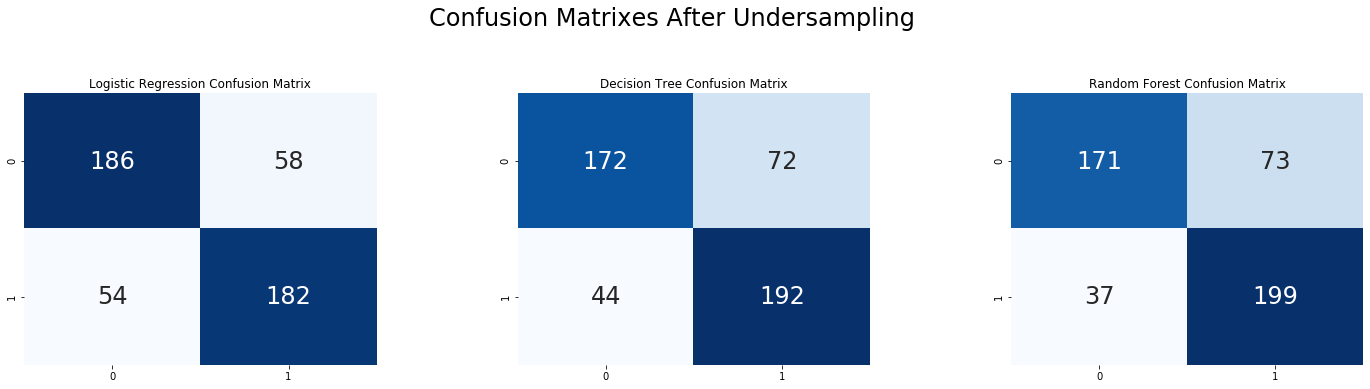

In [69]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes After Undersampling",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_log,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("Decision Tree Confusion Matrix")
sns.heatmap(cm_DT,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_RF,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()